# SingleImageSR use case

The Single Image Super Resolution (SISR) use case is build to compare the image quality between different SiSR solutions. A SiSR algorithm inputs one frame and outputs an image with greater resolution.
These are the methods that are being compared in the use case:


1. Fast Super-Resolution Convolutional Neural Network (FSRCNN)
2. Local Implicit Image Function (LIIF)
3. Multi-scale Residual Network (MSRN)

A use case in IQF usally involves wrapping a training within mlflow framework. In this case we estimate quality on the solutions offered by the different Dataset Modifiers which are the SISR algorithms. Similarity metrics against the Ground Truth are then compared.

In [1]:
import os
import shutil
import piq
import torch

from glob import glob
from scipy import ndimage
from typing import Any, Dict, Optional, Union, Tuple, List

import cv2
import numpy as np
import matplotlib.pyplot as plt

from iq_tool_box.datasets import DSModifier, DSWrapper,DSModifier_jpg
from iq_tool_box.experiments import ExperimentInfo, ExperimentSetup
from iq_tool_box.experiments.experiment_visual import ExperimentVisual
from iq_tool_box.experiments.task_execution import PythonScriptTaskExecution
from iq_tool_box.metrics import BBDetectionMetrics

from custom_iqf import SimilarityMetrics
from custom_iqf import DSModifierLIIF
from custom_iqf import DSModifierFSRCNN
from custom_iqf import DSModifierMSRN

In [13]:
mic = '-micro'
mic = ''

shutil.rmtree(f"./Data/test{mic}-ds/.ipynb_checkpoints",ignore_errors=True)

for el in os.listdir("./Data"):
    if el!="test" and "#" in el:
        shutil.rmtree(os.path.join("./Data",el),ignore_errors=True)

shutil.rmtree("./mlruns",ignore_errors=True)
!ls ./Data/

test-ds  test-micro-ds


In [14]:
#Define name of IQF experiment
experiment_name = "experimentA"

#Define path of the original(reference) dataset
data_path = f"./Data/test{mic}-ds"

#DS wrapper is the class that encapsulate a dataset
ds_wrapper = DSWrapper(data_path=data_path)

#Define path of the training script
python_ml_script_path = 'custom_train.py'

#List of modifications that will be applied to the original dataset:

ds_modifiers_list = [
    DSModifierMSRN( params={
        'zoom':3,
        'model':"MSRN/MSRN_1to033_x3_blur/model_epoch_1500.pth"#"MSRN/SISR_MSRN_X2_BICUBIC.pth"#"MSRN/MSRN_1to033_x3_blur/model_epoch_1500.pth"
    } ),
    DSModifierLIIF( params={
        'config0':"LIIF_config.json",
        'config1':"test_liif.yaml",
        'model':"liif_UCMerced/epoch-best.pth"
    } ),
    DSModifierFSRCNN( params={
        'config':"test.json",
        'model':"FSRCNN_1to033_x3_noblur/best.pth"
    } )
]

# Task execution executes the training loop
task = PythonScriptTaskExecution( model_script_path = python_ml_script_path )

MSRN/MSRN_1to033_x3_blur/model_epoch_1500.pth
{'model': 'MSRN/MSRN_1to033_x3_blur/model_epoch_1500.pth'}
https://image-quality-framework.s3-eu-west-1.amazonaws.com/iq-sisr-use-case/models/weights/MSRN/MSRN_1to033_x3_blur/model_epoch_1500.pth   /tmp/tmph7gksf61/model
Loaded MSRN  /tmp/tmph7gksf61/model
liif_UCMerced/epoch-best.pth
{'conf0': 'LIIF_config.json', 'conf1': 'test_liif.yaml', 'model': 'liif_UCMerced/epoch-best.pth'}
https://image-quality-framework.s3-eu-west-1.amazonaws.com/iq-sisr-use-case/models/config/LIIF_config.json   /tmp/tmp6mw4onln/conf0
https://image-quality-framework.s3-eu-west-1.amazonaws.com/iq-sisr-use-case/models/config/test_liif.yaml   /tmp/tmp6mw4onln/conf1
https://image-quality-framework.s3-eu-west-1.amazonaws.com/iq-sisr-use-case/models/weights/liif_UCMerced/epoch-best.pth   /tmp/tmp6mw4onln/model
FSRCNN_1to033_x3_noblur/best.pth
{'conf0': 'test.json', 'model': 'FSRCNN_1to033_x3_noblur/best.pth'}
https://image-quality-framework.s3-eu-west-1.amazonaws.com/iq-

In [15]:
#Experiment definition, pass as arguments all the components defined beforehand
experiment = ExperimentSetup(
    experiment_name=experiment_name,
    task_instance=task,
    ref_dsw_train=ds_wrapper,
    ds_modifiers_list=ds_modifiers_list,
    repetitions=1
)

In [16]:
#Execute the experiment
experiment.execute()

For each image file in <./Data/test-ds/test>...
(232, 232, 3)
(232, 232, 3)


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3063: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 

(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 232, 3)
(232, 

In [17]:
experiment_info = ExperimentInfo(experiment_name)
# experiment_info.__dict__

In [18]:
# ExperimentInfo is used to retrieve all the information of the whole experiment. 
# It contains built in operations but also it can be used to retrieve raw data for futher analysis

win=128

_ = experiment_info.apply_metric_per_run(
    SimilarityMetrics(
        experiment_info,
        ext='tif',
        n_pyramids=3,
        slice_size=7,
        n_descriptors=win,
        n_repeat_projection=win,
        proj_per_repeat=4,
        device='cpu',
        return_by_resolution=False,
        pyramid_batchsize=win
    ),
    ds_wrapper.json_annotations,
)

# PSNR
# SSIM
# Sliced Wasserstein Distance
# Frechet Inception Distance

Estimating similarity metrics 0/3...
Estimating similarity metrics 1/3...
Estimating similarity metrics 2/3...
different size found torch.Size([1, 3, 230, 232]) torch.Size([1, 3, 231, 232])
Estimating similarity metrics 3/3...
Estimating similarity metrics 0/3...
Estimating similarity metrics 1/3...
Estimating similarity metrics 2/3...
different size found torch.Size([1, 3, 232, 232]) torch.Size([1, 3, 231, 232])
Estimating similarity metrics 3/3...
different size found torch.Size([1, 3, 230, 232]) torch.Size([1, 3, 232, 232])
Estimating similarity metrics 0/3...
Estimating similarity metrics 1/3...
Estimating similarity metrics 2/3...
different size found torch.Size([1, 3, 231, 231]) torch.Size([1, 3, 231, 232])
Estimating similarity metrics 3/3...


In [57]:
from iq_tool_box.metrics import RERMetric

_ = experiment_info.apply_metric_per_run(
    RERMetric(
        experiment_info,
        win=16,
        stride=16,
        ext='tif'
    ),
    ds_wrapper.json_annotations,
)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/iq_tool_box/metrics/rer_metric.py:50: RuntimeWarning: divide by zero encountered in true_divide
  result /= result_max
/usr/local/lib/python3.6/dist-packages/iq_tool_box/metrics/rer_metric.py:50: RuntimeWarning: invalid value encountered in true_divide
  result /= result_max


In [58]:
df = experiment_info.get_df(
    ds_params=["modifier"],
    metrics=['ssim','psnr','swd','fid','rer_0','rer_1','rer_2'],
    dropna=False
)

In [59]:
df

,name,ds_modifier,ssim,psnr,swd,fid,rer_0,rer_1,rer_2
0,test-ds#sisr+FSRCNN_test_FSRCNN_1to033_x3_nobl...,sisr+FSRCNN_test_FSRCNN_1to033_x3_noblur-best,0.356939,12.647311,1853.490245,12.852558,-3.87845,-2.462313,NaN
1,test-ds#sisr+LIIF_LIIF_config_test_liif_liif_U...,sisr+LIIF_LIIF_config_test_liif_liif_UCMerced-...,0.229142,10.571871,3149.259634,19.735620,NaN,NaN,NaN
2,test-ds#mfsr+MSRN_modifier,mfsr+MSRN_modifier,0.709219,24.325575,1251.663438,0.766343,NaN,NaN,NaN


# Visualize

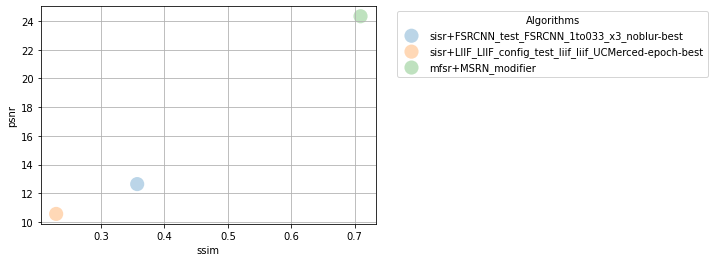

In [26]:
fig, ax = plt.subplots()

for i in df.index:
    ax.scatter(df['ssim'][i],df['psnr'][i], s=200., label=df['ds_modifier'][i],
               alpha=0.3, edgecolors='none')

ax.set_xlabel('ssim')
ax.set_ylabel('psnr')
ax.legend(title='Algorithms', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)

plt.show()

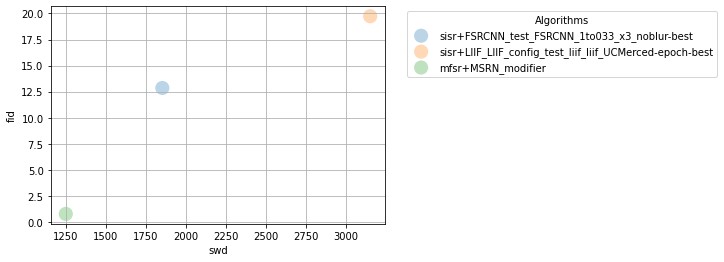

In [27]:
fig, ax = plt.subplots()

for i in df.index:
    ax.scatter(df['swd'][i],df['fid'][i], s=200., label=df['ds_modifier'][i],
               alpha=0.3, edgecolors='none')

ax.set_xlabel('swd')
ax.set_ylabel('fid')
ax.legend(title='Algorithms', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)

plt.show()

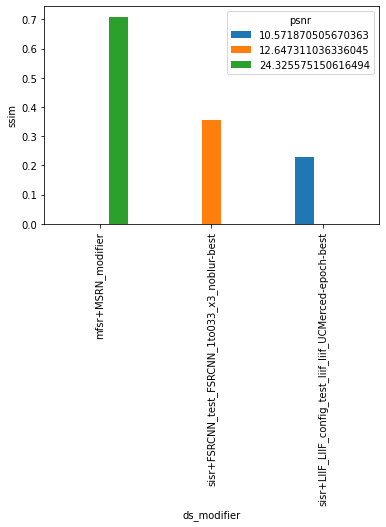

In [28]:
ev = ExperimentVisual(df, None)

ev.visualize(
    plot_kind="bars",
    xvar="ds_modifier",
    yvar="ssim",
    legend_var='psnr',
    title=""
)

In [29]:
from PIL import Image as pil_image
import matplotlib.pyplot as plt

lst_lst = [
    glob(r"./Data/test-micro-ds/test/*"),
    glob(r"./Data/test-micro-ds#mfsr+MSRN_modifier/test/*"),
    glob(r"./Data/test-micro-ds#sisr+FSRCNN_test_FSRCNN_1to033_x3_noblur-best/test/*"),
    glob(r"./Data/test-micro-ds#sisr+LIIF_LIIF_config_test_liif_liif_UCMerced-epoch-best/test/*")
]

lst_lst[-1] = [lst_lst[-1][ii] for ii in [2,3,0,1,4]]

for enu,_ in enumerate( lst_lst[0] ):
    
    n_alg = len(lst_lst)
    
    arr_lst = [
        cv2.imread( lst_lst[i][enu] ) if i<2 else cv2.imread( lst_lst[i][enu] )[...,::-1]
        for i in range( n_alg ) 
    ]
    
    fig,ax = plt.subplots(1, n_alg ,figsize=(20,7), gridspec_kw={'wspace':0, 'hspace':0},squeeze=True)
    for i in range( n_alg ):
        ax[i].imshow( arr_lst[i])
        ax[i].axis('off')
    
    plt.show()

IndexError: list index out of range